## Import Utils

In [1]:
!pip install keras

In [2]:
import keras
import h5py as h5
import numpy as np

PATH_DATA = 'data/train/eightieth.h5'
PATH_PREDICT_WITHOUT_GT = 'data/pred_students/pred_eighties_from_half_1_without_gt.h5'
PATH_SUBMIT = 'test.h5'
PATH_PREDICT_WITH_GT = 'data/pred_teachers/pred_eighties_from_half_1.h5'

/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
f = h5.File(PATH_DATA, 'r')
PATH_DATA_AUG = 'data/train/eightieth_aug_v4.h5'
repre, bins = np.histogram(f['TOP_LANDCOVER'], bins=range(23))
print(repre)

[    0 10988 29178 39369 15017 60779     6     0     0     0   814    66
 50944     0    40     0     0     2     0     6 26791     0]


In [4]:
f2 = h5.File(PATH_PREDICT_WITH_GT, 'r')
repre_cible, bins = np.histogram(f2['TOP_LANDCOVER'], bins=range(23))
print(repre_cible)

[    0 76852 15049 42539  5211 51730     1     0     0     0  1802   216
 43097     0   307     0     0  2204    64   237  2391     0]


In [5]:
f_res = h5.File(PATH_DATA_AUG, 'w')
data = []
label = []
nb_max = repre[np.argmax(repre)]
#parcour data
for i in range(len(f['S2'])):
    #print('current step : '+str(i)+'/'+str(len(f['S2']))+ ' adding patch of classes '+str(int(f['TOP_LANDCOVER'][i]))+'             ', end='\r')
    #data.append(f['S2'][i])
    #label.append(f['TOP_LANDCOVER'][i])
    ### test 1 ####
    # si on est pas dans la classe majoritaire
    #nb_patch_to_create = int((nb_max - repre[int(f['TOP_LANDCOVER'][i])]) / 50)
    #if repre[int(f['TOP_LANDCOVER'][i])] < nb_max and nb_patch_to_create > 0:
        # créer des patch bruités
    #    tmp = f['S2'][i]
    
    #### test 2 ####
    #if repre[int(f['TOP_LANDCOVER'][i])] < repre_cible[int(f['TOP_LANDCOVER'][i])]:
        #nb_patch_to_create =1 + int((repre_cible[int(f['TOP_LANDCOVER'][i])] - repre[int(f['TOP_LANDCOVER'][i])]) / repre[int(f['TOP_LANDCOVER'][i])])
    #### test 3 #### 
    
    print('current step : '+str(i)+'/'+str(len(f['S2']))+ ' creating 3 patch of classes '+str(int(f['TOP_LANDCOVER'][i]))+'   ', end='\r')
    tmp = f['S2'][i]
    data.append(tmp)
    label.append(f['TOP_LANDCOVER'][i])
    for j in range(3):
        #noise = np.random.normal(0,10,(16,16,4))
        tmp = np.transpose(tmp, (1, 0, 2))
        data.append(tmp)
        label.append(f['TOP_LANDCOVER'][i])
            
    
top_data = f_res.create_dataset('S2', data=data)

top_landcover = f_res.create_dataset('TOP_LANDCOVER', data=label)

In [6]:
repre_aug, bins = np.histogram(f_res['TOP_LANDCOVER'], bins=range(23))
print(repre)
print(repre_aug)
print(repre_cible)


[    0 10988 29178 39369 15017 60779     6     0     0     0   814    66
 50944     0    40     0     0     2     0     6 26791     0]
[     0  43952 116712 157476  60068 243116     24      0      0      0
   3256    264 203776      0    160      0      0      8      0     24
 107164      0]
[    0 76852 15049 42539  5211 51730     1     0     0     0  1802   216
 43097     0   307     0     0  2204    64   237  2391     0]


# Vérification

/usr/lib64/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


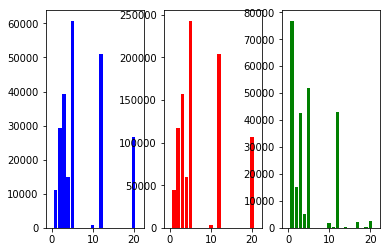

In [8]:
import matplotlib.pyplot as plt

x = range(len(repre))
plt.subplot(131)
plt.bar(x, repre, color="blue")
plt.subplot(132)
plt.bar(x, repre_aug, color="red")
plt.subplot(133)
plt.bar(x, repre_cible, color="green")

fig = plt.gcf()
fig.show()